BloomTech Data Science

*Unit 2, Sprint 1, Module 2*

---

# Module Project: Regression II

In this project, you'll continue working with the New York City rent dataset you used in the last module project.

## Directions

The tasks for this project are as follows:

- **Task 1:** Import `csv` file using `wrangle` function.
- **Task 2:** Conduct exploratory data analysis (EDA), and modify `wrangle` function to engineer two new features.
- **Task 3:** Split data into feature matrix `X` and target vector `y`.
- **Task 4:** Split feature matrix `X` and target vector `y` into training and test sets.
- **Task 5:** Establish the baseline mean absolute error for your dataset.
- **Task 6:** Build and train a `Linearregression` model.
- **Task 7:** Calculate the training and test mean absolute error for your model.
- **Task 8:** Calculate the training and test $R^2$ score for your model.
- **Stretch Goal:** Determine the three most important features for your linear regression model.

**Note**

You should limit yourself to the following libraries for this project:

- `matplotlib`
- `numpy`
- `pandas`
- `sklearn`

# I. Wrangle Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [84]:
def wrangle(filepath):
    df = pd.read_csv(filepath,
                     header=0,
                     parse_dates=['created'],
                     index_col='created')

    # remove rows with NaN values
    df.dropna(inplace=True)

    df['desc_len'] = df['description'].str.len()
    df['cats_and_dogs_allowed'] = np.where((df['cats_allowed'] == 1) & (df['dogs_allowed'] == 1), 1, 0)
    df['total_rooms'] = df['bedrooms'] + df['bathrooms']

    # Remove the most extreme 1% prices,
    # the most extreme .1% latitudes, &
    # the most extreme .1% longitudes
    df = df[(df['price'] >= np.percentile(df['price'], 0.5)) &
            (df['price'] <= np.percentile(df['price'], 99.5)) &
            (df['latitude'] >= np.percentile(df['latitude'], 0.05)) &
            (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
            (df['longitude'] >= np.percentile(df['longitude'], 0.05)) &
            (df['longitude'] <= np.percentile(df['longitude'], 99.95))]

    return df

filepath = 'https://raw.githubusercontent.com/bloominstituteoftechnology/DS-Unit-2-Linear-Models/master/data/apartments/renthop-nyc.csv'

**Task 1:** Add the following functionality to the above `wrangle` function.

- The `'created'` column will parsed as a `DateTime` object and set as the `index` of the DataFrame.
- Rows with `NaN` values will be dropped.

Then use your modified function to import the `renthop-nyc.csv` file into a DataFrame named `df`.

In [ ]:
# df['desc_len'] = df['description'].str.len()
# df['cats_and_dogs_allowed'] = np.where((df['cats_allowed'] == 1) & (df['dogs_allowed'] == 1), 1, 0)
# df['total_rooms'] = df['bedrooms'] + df['bathrooms']

In [85]:
df = wrangle(filepath)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 47260 entries, 2016-06-24 07:54:24 to 2016-04-12 02:48:07
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   bathrooms              47260 non-null  float64
 1   bedrooms               47260 non-null  int64  
 2   description            47260 non-null  object 
 3   display_address        47260 non-null  object 
 4   latitude               47260 non-null  float64
 5   longitude              47260 non-null  float64
 6   price                  47260 non-null  int64  
 7   street_address         47260 non-null  object 
 8   interest_level         47260 non-null  object 
 9   elevator               47260 non-null  int64  
 10  cats_allowed           47260 non-null  int64  
 11  hardwood_floors        47260 non-null  int64  
 12  dogs_allowed           47260 non-null  int64  
 13  doorman                47260 non-null  int64  
 14  dishwasher         

In [87]:
df.head()

,bathrooms,bedrooms,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,...,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space,desc_len,cats_and_dogs_allowed,total_rooms
created,,,,,,,,,,,,,,,,,,,,,
2016-06-24 07:54:24,1.5,3,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,...,0,0,0,0,0,0,0,588,0,4.5
2016-06-12 12:19:27,1.0,2,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,...,0,0,0,0,0,0,0,8,1,3.0
2016-04-17 03:26:41,1.0,1,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,...,0,0,0,0,0,0,0,691,0,2.0
2016-04-18 02:22:02,1.0,1,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,...,0,0,0,0,0,0,0,492,0,2.0
2016-04-28 01:32:41,1.0,4,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,...,0,0,0,0,0,0,0,479,0,5.0


**Task 2:** Using your `pandas` and dataviz skills decide on two features that you want to engineer for your dataset. Next, modify your `wrangle` function to add those features.

**Note:** You can learn more about feature engineering [here](https://en.wikipedia.org/wiki/Feature_engineering). Here are some ideas for new features:

- Does the apartment have a description?
- Length of description.
- Total number of perks that apartment has.
- Are cats _or_ dogs allowed?
- Are cats _and_ dogs allowed?
- Total number of rooms (beds + baths).

# II. Split Data

**Task 3:** Split your DataFrame `df` into a feature matrix `X` and the target vector `y`. You want to predict `'price'`.

**Note:** In contrast to the last module project, this time you should include _all_ the numerical features in your dataset.

In [88]:
target = 'price'
# columns_to_drop = [target, 'description', 'display_address', 'street_address', 'interest_level']
X = df.select_dtypes('number').drop(columns=target)
y = df[target]

In [89]:
X.shape, y.shape

((47260, 31), (47260,))

**Task 4:** Split `X` and `y` into a training set (`X_train`, `y_train`) and a test set (`X_test`, `y_test`).

- Your training set should include data from April and May 2016.
- Your test set should include data from June 2016.

In [96]:
# Time-Series train-test-split

# Ensure the index is in datetime format
# X.index = pd.to_datetime(X.index)
# y.index = pd.to_datetime(y.index)

# single cutoff
cutoff = '2016-06-01'
mask = X.index < cutoff

# Define cutoff dates as datetime objects
# training_start_cutoff = pd.to_datetime('2016-04-01')
# training_end_cutoff = pd.to_datetime('2016-05-31')
# testing_start_cutoff = pd.to_datetime('2016-06-01')
# testing_end_cutoff = pd.to_datetime('2016-06-30')

# create masks for training and testing sets
# training_mask = (X.index >= training_start_cutoff) & (X.index <= training_end_cutoff)
# testing_mask = (X.index >= testing_start_cutoff) & (X.index <= testing_end_cutoff)

X_train, y_train = X.loc[mask], y.loc[mask]
X_test, y_test = X.loc[~mask], y.loc[~mask]

# sanity check
assert len(X_test) + len(X_train) == len(X)

In [97]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((30806, 31), (30806,), (16454, 31), (16454,))

# III. Establish Baseline

**Task 5:** Since this is a **regression** problem, you need to calculate the baseline mean absolute error for your model. First, calculate the mean of `y_train`. Next, create a list `y_pred` that has the same length as `y_train` and where every item in the list is the mean. Finally, use `mean_absolute_error` to calculate your baseline.

In [98]:
# mean of the absolute errors
y_train_mean = y_train.mean()
y_pred = [y_train_mean] * len(y_train)
baseline_mae = mean_absolute_error(y_train, y_pred) # difference between actual values and baseline mean value

print('Mean Apt Rent:', y_train_mean) # $3573
print('Baseline MAE:', baseline_mae) # $1202

Mean Apt Rent: 3573.2410569369604
Baseline MAE: 1202.398300781848


# IV. Build Model

**Task 6:** Build and train a `LinearRegression` model named `model` using your feature matrix `X_train` and your target vector `y_train`.

In [99]:
# Step 1: Import predictor class
# imported above from sklearn.linear_model

# Step 2: Instantiate predictor
model = LinearRegression()

# Step 3: Fit predictor on the (training) data
model.fit(X_train, y_train)

LinearRegression()

# V. Check Metrics

**Task 7:** Calculate the training and test mean absolute error for your model.

In [100]:
training_mae = mean_absolute_error(y_train, model.predict(X_train))
test_mae = mean_absolute_error(y_test, model.predict(X_test))

print('Training MAE:', training_mae)
print('Test MAE:', test_mae)

Training MAE: 692.5825870871256
Test MAE: 701.1773006806638


**Task 8:** Calculate the training and test $R^2$ score for your model.

In [101]:
training_r2 = r2_score(y_train, model.predict(X_train)) # model.score(X_train, y_train)
test_r2 = r2_score(y_test, model.predict(X_test)) # model.score(X_test, y_test)

print('Training r2:', training_r2)
print('Test r2:', test_r2)

Training r2: 0.6164320027205004
Test r2: 0.6261548870791145


# VI. Communicate Results

**Stretch Goal:** What are the three most influential coefficients in your linear model? You should consider the _absolute value_ of each coefficient, so that it doesn't matter if it's positive or negative.

In [102]:
model.coef_

array([ 1.01608830e+03, -2.70523243e+02,  1.62768342e+03, -1.35912345e+04,
        1.31808196e+02, -4.64507536e+01, -2.06326439e+02, -1.98678705e+02,
        4.77702333e+02,  5.41662155e+01, -1.66841075e+02, -2.55347417e+02,
        1.32261728e+02, -6.65146398e+01,  4.97679987e+02, -1.62292567e+02,
       -1.12793909e+02,  2.47385688e+02, -3.37147115e+02, -4.79220931e+01,
        6.13626263e+01, -1.40237739e+02,  1.81880197e+02,  1.43215041e+02,
        1.14924381e+02, -4.63466420e+01,  1.88908624e+02, -8.16823375e+01,
        4.32317343e-02,  2.95754188e+02,  7.45565061e+02])

In [103]:
X_train.columns

Index(['bathrooms', 'bedrooms', 'latitude', 'longitude', 'elevator',
       'cats_allowed', 'hardwood_floors', 'dogs_allowed', 'doorman',
       'dishwasher', 'no_fee', 'laundry_in_building', 'fitness_center',
       'pre-war', 'laundry_in_unit', 'roof_deck', 'outdoor_space',
       'dining_room', 'high_speed_internet', 'balcony', 'swimming_pool',
       'new_construction', 'terrace', 'exclusive', 'loft', 'garden_patio',
       'wheelchair_access', 'common_outdoor_space', 'desc_len',
       'cats_and_dogs_allowed', 'total_rooms'],
      dtype='object')

In [105]:
coefficients = model.coef_
features = X_train.columns

In [109]:
pd.Series(coefficients, index=features).sort_values(key=abs).tail(3)

,0
bathrooms,1016.088304
latitude,1627.683419
longitude,-13591.234455


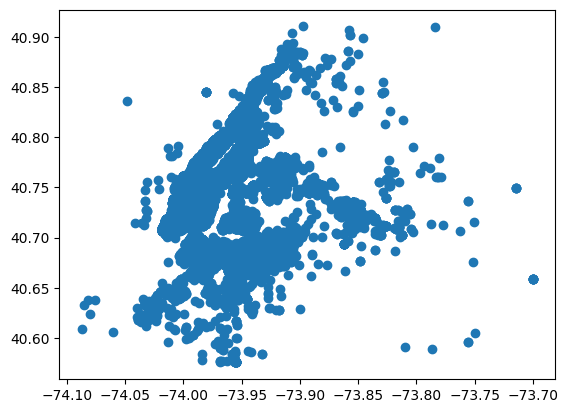

In [110]:
plt.scatter(X_train['longitude'], X_train['latitude'])

In [104]:
# coefficients = model.coef_
# features = X_train.columns

# combine into a dictionary
feature_dict = dict(zip(features, coefficients))

# feature_dict
# sort by absolute values in descending order
# feature_dict.items() gives a list of tuples with key, value
# sorted takes the list and returns a new list with the elements sorted
# key=lambda x: abs(x[1]) specifies a function to transform each element before comparison (the num at index 1 in each tuple)
# lambda function is a small, unnamed function defined on the fly
# lambda x: <expression> means "take input x and return the result of <expression>"
# x is each tuple from items(), x[1] gets the coef (2nd element of tuple), abs() function returns absolute value
# key function returns the absolute values
# sorted uses these values to determine the order in ascending order, then reverses it
sorted_items = sorted(feature_dict.items(), key=lambda x: abs(x[1]), reverse=True)

sorted_items

[('longitude', np.float64(-13591.234455289914)),
 ('latitude', np.float64(1627.6834185640682)),
 ('bathrooms', np.float64(1016.088303916119)),
 ('total_rooms', np.float64(745.5650610923908)),
 ('laundry_in_unit', np.float64(497.67998663212376)),
 ('doorman', np.float64(477.7023326523352)),
 ('high_speed_internet', np.float64(-337.1471149760592)),
 ('cats_and_dogs_allowed', np.float64(295.75418814214896)),
 ('bedrooms', np.float64(-270.5232428273434)),
 ('laundry_in_building', np.float64(-255.34741667044332)),
 ('dining_room', np.float64(247.38568845260016)),
 ('hardwood_floors', np.float64(-206.3264392388686)),
 ('dogs_allowed', np.float64(-198.67870520001185)),
 ('wheelchair_access', np.float64(188.90862404268134)),
 ('terrace', np.float64(181.8801969782942)),
 ('no_fee', np.float64(-166.8410746265415)),
 ('roof_deck', np.float64(-162.29256732359548)),
 ('exclusive', np.float64(143.2150407084663)),
 ('new_construction', np.float64(-140.2377386266624)),
 ('fitness_center', np.float64(1

The three most influential coefficients in the linear model are longitude, latitude, and bathrooms.